In [7]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [151]:
# assume some unit gaussian 10-D input data
D = np.random.randn(10,500)
print type(D), D.shape

#D = np.random.randn(2,5)
#print D
#print D[0]
#df = pd.DataFrame(D)
#print df
#print df[0]
#?df


<type 'numpy.ndarray'> (10, 500)


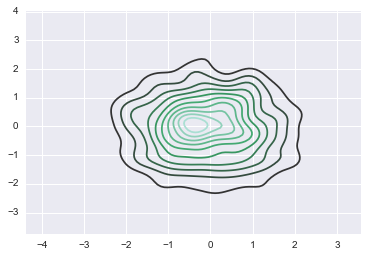

In [152]:
#http://chrisalbon.com/python/pandas_with_seaborn.html
sns.kdeplot(df)

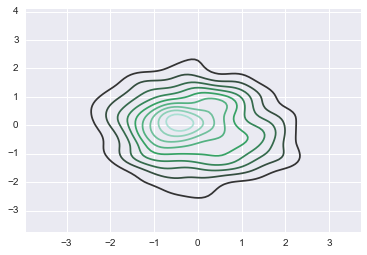

In [153]:
type(df[0:500])
sns.kdeplot(df[0:499])

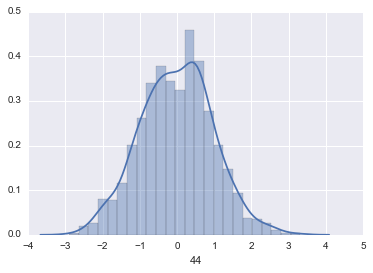

In [154]:
sns.distplot(df[44])


In [155]:
hidden_layer_sizes = [500]*10
hidden_layer_sizes

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500]

In [156]:
nonlinearities = ['tanh']*len(hidden_layer_sizes)
nonlinearities

['tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh']

In [157]:
act = {'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}
print act


{'relu': <function <lambda> at 0x116534320>, 'tanh': <function <lambda> at 0x116b77398>}


In [158]:
print type(D[45]), len(D[45]), D[45][:5]
print act['relu'](D[45][:5])
sns.kdeplot(act['relu'](D[45]))

IndexError: index 45 is out of bounds for axis 0 with size 10

In [ ]:
print D[45][:2]
sns.kdeplot(D[45][:2])

In [ ]:
sns.distplot(D[45][:5])

In [ ]:
xrange(len(hidden_layer_sizes))

In [8]:
# assume some unit gaussian 10-D input data
# sampling a data set of 1000 points that are 500 dimensional
D = np.random.randn(1000,500)
print type(D), D.shape, D.shape[0], D.shape[1]
#10 hidden layers of 500 units. same size. 
hidden_layer_sizes = [500]*10
print hidden_layer_sizes, len(hidden_layer_sizes)



<type 'numpy.ndarray'> (1000, 500) 1000 500
[500, 500, 500, 500, 500, 500, 500, 500, 500, 500] 10


In [10]:
'''
in the quest for unit gaussian activations
http://cs231n.github.io/neural-networks-2/#init
http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization
https://www.youtube.com/watch?v=gYpoJMlgyXA

init_wts = 0
not symmetry breaking

init_wts = 0.01
all activations basically become 0
in backward pass, gradients are gonna be super small if X's are very small. 
gradient = X*(gradient from top) .. so no gradient accumulates
sucessively multiply by in backprop.

init_wts = 1.0
almost all neurons/activations fully saturated, either -1 or +1
as the weights are large and end up saturating the tanh neurons
Gradients will be 0

Xavier initialization
init_wts = 1/np.sqrt(fan_in)
lots of inputs => lower wts
smaller number of inputs => more wts
still have some decay in variance but not as dramatic. 
reasonable initialization for tanh
breaks down for relu. factor of 2 not accounted since relu halves the variance
so we use 1/(np.sqrt(fan_in/2)) for relu
'''

nl_type = 'tanh'
nl_type = 'relu'
act = {'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}

nl_type = 'tanh' # or 'relu'
nonlinearities = [nl_type]*len(hidden_layer_sizes)
print nonlinearities
#init_wts = [0, 0.01, 1.0, 1/(np.sqrt(fan_in)), 1/(np.sqrt(fan_in/2))]

Hs={}
for i in xrange(len(hidden_layer_sizes)):
    X = D if i==0 else Hs[i-1] # input at this layer
    print 'input at layer %s is shape %s' %(i, X.shape)
    # we pick column size of incoming layer & row size of outgoing layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    print 'fan_in: %s, fan_out: %s' %(fan_in, fan_out)
    init_wts = 1/(np.sqrt(fan_in/2))
    print "init_wts: %s" %init_wts
    W = np.random.randn(fan_in, fan_out)*init_wts # layer initialization
    H = np.dot(X,W) # matrix multiply
    H = act[nonlinearities[i]](H) # nonlinearity
    Hs[i] = H # cache result on this layer
    print type(H), H.shape

print len(Hs), type(Hs)

['tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh']
input at layer 0 is shape (1000, 500)
fan_in: 500, fan_out: 500
init_wts: 0.0632455532034
<type 'numpy.ndarray'> (1000, 500)
input at layer 1 is shape (1000, 500)
fan_in: 500, fan_out: 500
init_wts: 0.0632455532034
<type 'numpy.ndarray'> (1000, 500)
input at layer 2 is shape (1000, 500)
fan_in: 500, fan_out: 500
init_wts: 0.0632455532034
<type 'numpy.ndarray'> (1000, 500)
input at layer 3 is shape (1000, 500)
fan_in: 500, fan_out: 500
init_wts: 0.0632455532034
<type 'numpy.ndarray'> (1000, 500)
input at layer 4 is shape (1000, 500)
fan_in: 500, fan_out: 500
init_wts: 0.0632455532034
<type 'numpy.ndarray'> (1000, 500)
input at layer 5 is shape (1000, 500)
fan_in: 500, fan_out: 500
init_wts: 0.0632455532034
<type 'numpy.ndarray'> (1000, 500)
input at layer 6 is shape (1000, 500)
fan_in: 500, fan_out: 500
init_wts: 0.0632455532034
<type 'numpy.ndarray'> (1000, 500)
input at layer 7 is shape (1000, 500)
fan_in

input layer had mean 0.001234 and std 1
hidden layer 1 had mean 0.562543 and std 0.825399
hidden layer 2 had mean 0.570377 and std 0.827691
hidden layer 3 had mean 0.551406 and std 0.807834
hidden layer 4 had mean 0.507795 and std 0.770432
hidden layer 5 had mean 0.492962 and std 0.736033
hidden layer 6 had mean 0.502858 and std 0.725352
hidden layer 7 had mean 0.516940 and std 0.747809
hidden layer 8 had mean 0.516898 and std 0.743196
hidden layer 9 had mean 0.503097 and std 0.744958
hidden layer 10 had mean 0.534425 and std 0.748979


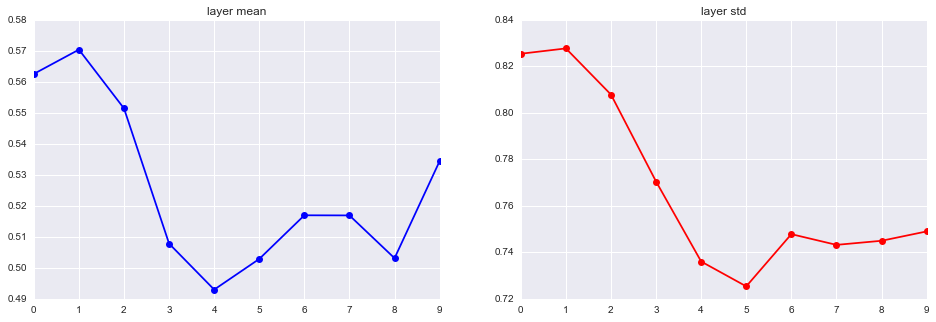

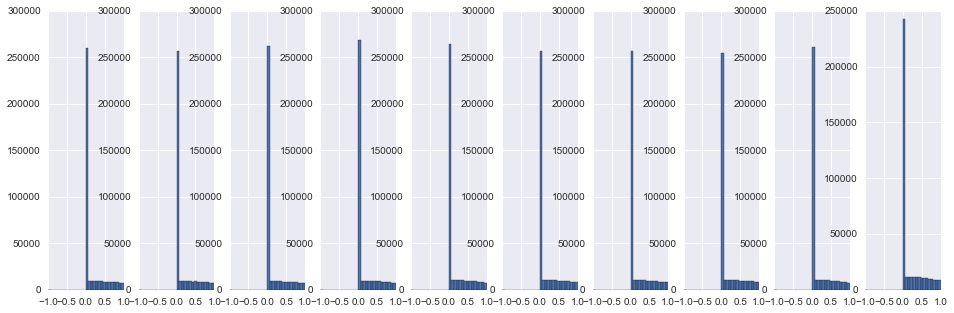

In [223]:
# look at distributions at each layer
print 'input layer had mean %f and std %d' %(np.mean(D), np.std(D))
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]
for i,H in Hs.iteritems():
        print 'hidden layer %d had mean %f and std %f' %(i+1, layer_means[i], layer_stds[i])

# plot the means and standdard deviations
figsize = (16,5)
plt.figure(figsize=figsize)
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

# plot the raw distribution
plt.figure(figsize=figsize)
#fig = plt.figure(figsize=(16,12))
for i,H in Hs.iteritems():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1,1))
    #break
    


In [193]:
X = np.random.randn(10,5)
W = np.random.randn(5, 5)*0.01 # layer initialization
print X
print W
H = np.dot(X,W) # matrix multiply
print type(H), H.shape
print H

[[ 0.21707631  0.84207334  1.35479271 -0.32795328 -0.07923653]
 [ 1.03701796  0.55497554  1.70380991 -1.07509267  1.82563525]
 [-0.84438982  0.34678968  0.15529135  1.58505637  1.09458284]
 [ 1.04911235 -0.28090124  1.18199716  0.15331878 -1.14793836]
 [ 0.46831973 -0.30855598 -0.36763157  1.40026757 -0.60033788]
 [-0.16808867  1.15972588  0.60314086  0.11108911 -0.75436855]
 [ 0.07467975  1.3149353   0.93561193  0.04895016  0.18101994]
 [ 0.63389766  0.10839407 -0.15719921  0.55613382  0.83400033]
 [-0.62043292  0.30262357 -1.15375853 -1.5395602   2.09649889]
 [ 1.35335741  0.04613851 -0.07272307 -0.09107342  1.00148002]]
[[ 0.00045303 -0.00615546 -0.0073592  -0.00195461  0.00159931]
 [-0.00585808 -0.00817187 -0.0065521  -0.0144933   0.01146184]
 [-0.00531916  0.00192972 -0.02651635  0.01126285 -0.00108781]
 [-0.00227142 -0.00308879  0.00464631  0.00221882 -0.00464713]
 [ 0.00569009 -0.01059444  0.0021275   0.00742092  0.01440203]]
<type 'numpy.ndarray'> (10, 5)
[[-0.0117469  -0.00375